## Prophet - Time Series Forecasting

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.


### Import the required libraries

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

In [25]:
# import the required libraries
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


### Read the CSV file that contains the Amazon share trading data

Note that the csv contains the following columns
Date,Open,High,Low,Close,Volume,Name

We will only consider the "Date" and "Close" column for each day to do the prediction.

In [26]:
# read the data
data = pd.read_csv('./AABA_2006-01-01_to_2018-01-01.csv')

### Pre process the data

Prophet expects only 2 columns in the pandas dataframe that will be used for prediction. It has to have 2 columns 'ds' and 'y'. We will convert the data in that format

In [27]:
data['ds'] = data['Date']
data['y'] = data['Close']
data = data.drop(data.columns[[0,1,2,3,4,5,6]], axis=1)

### Fit the model

We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical data frame. Fitting should take 1-5 seconds.

In [28]:
model = Prophet()
model.fit(data)

21:30:47 - cmdstanpy - INFO - Chain [1] start processing
21:30:49 - cmdstanpy - INFO - Chain [1] done processing


### Create Future Data Frames

You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [29]:
future = model.make_future_dataframe(periods=120)

### Predict

The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.



In [30]:
forecast = model.predict(future)

### Plot the forecast

You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.


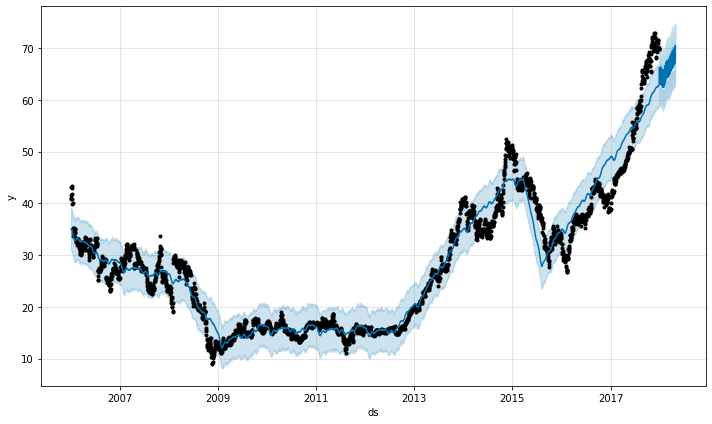

In [31]:
plot = model.plot(forecast)

If you want to see the forecast components, you can use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.


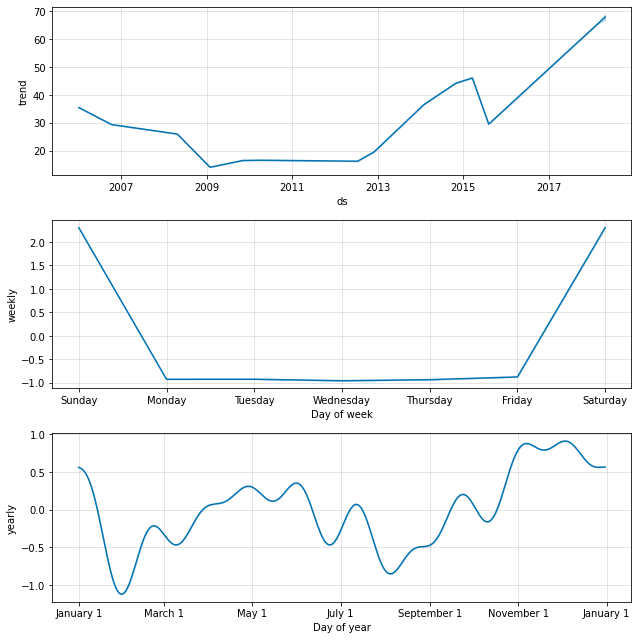

In [32]:
plot = model.plot_components(forecast)

### Plot the forecast using plotly

An interactive figure of the forecast and components can be created with plotly. You will need to install plotly 4.0 or above separately, as it will not by default be installed with prophet. You will also need to install the notebook and ipywidgets packages.



In [33]:
plot_plotly(model, forecast)

In [34]:
plot_components_plotly(model, forecast)